# EDA OF NOSHOW APPOINTMENTS IN MAY 2016.

#### INTRODUCTION

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment.

#### QUESTIONS

From this data, we seek to answer the following questions:
1. Which gender; male or female had a higher number of no shows?
2. Were most no shows from patients under scolarship or not?
3. Did the no shows receive SMS for their appointments?
4. Which day of the week had the most Noshows?

#### DATA WRANGLING

In [3]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#Loading the dataset
df = pd.read_csv(r'C:\Users\Sherry\Downloads\noshowappointments-kagglev2-may-2016 (1).csv')
df.head()                 

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [5]:
#Examining attributes of the data
df.shape

(110527, 14)

In [6]:
#Examining the datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
# converting date time into correct format
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.ScheduledDay.head(5)

0   2016-04-29 18:38:08+00:00
1   2016-04-29 16:08:27+00:00
2   2016-04-29 16:19:04+00:00
3   2016-04-29 17:29:31+00:00
4   2016-04-29 16:07:23+00:00
Name: ScheduledDay, dtype: datetime64[ns, UTC]

In [8]:
#converting appointmentday into the correct date time format:
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)
df.AppointmentDay.head(5)

0   2016-04-29 00:00:00+00:00
1   2016-04-29 00:00:00+00:00
2   2016-04-29 00:00:00+00:00
3   2016-04-29 00:00:00+00:00
4   2016-04-29 00:00:00+00:00
Name: AppointmentDay, dtype: datetime64[ns, UTC]

In [9]:
#converting the date column to dataframe
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], format = '%Y-%m-%d %H:%M')
df.head()

PatientId  AppointmentID Gender              ScheduledDay  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08+00:00   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27+00:00   
2  4.262962e+12        5642549      F 2016-04-29 16:19:04+00:00   
3  8.679512e+11        5642828      F 2016-04-29 17:29:31+00:00   
4  8.841186e+12        5642494      F 2016-04-29 16:07:23+00:00   

             AppointmentDay  Age      Neighbourhood  Scholarship  \
0 2016-04-29 00:00:00+00:00   62    JARDIM DA PENHA            0   
1 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   
2 2016-04-29 00:00:00+00:00   62      MATA DA PRAIA            0   
3 2016-04-29 00:00:00+00:00    8  PONTAL DE CAMBURI            0   
4 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   

   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show  
0             1         0           0        0             0      No  
1             0         0           0        0             0      No  
2             0         0           0        0             0      No  
3             0         0           0        0             0      No  
4             1         1           0        0             0      No

In [12]:
#Creating a new column of the week days
df['Weekday'] = df['AppointmentDay'].apply(lambda time : time.dayofweek)

In [13]:
#creating a new column with days
df['Weekday']=pd.DatetimeIndex(df['AppointmentDay']).day_name()
df.head()

PatientId  AppointmentID Gender              ScheduledDay  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08+00:00   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27+00:00   
2  4.262962e+12        5642549      F 2016-04-29 16:19:04+00:00   
3  8.679512e+11        5642828      F 2016-04-29 17:29:31+00:00   
4  8.841186e+12        5642494      F 2016-04-29 16:07:23+00:00   

             AppointmentDay  Age      Neighbourhood  Scholarship  \
0 2016-04-29 00:00:00+00:00   62    JARDIM DA PENHA            0   
1 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   
2 2016-04-29 00:00:00+00:00   62      MATA DA PRAIA            0   
3 2016-04-29 00:00:00+00:00    8  PONTAL DE CAMBURI            0   
4 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   

   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show Weekday  
0             1         0           0        0             0      No  Friday  
1             0         0           0        0             0      No  Friday  
2             0         0           0        0             0      No  Friday  
3             0         0           0        0             0      No  Friday  
4             1         1           0        0             0      No  Friday

In [14]:
#Renaming the No-show column to Noshow
df = df.rename(columns={'No-show': 'Noshow'})
df.head()

PatientId  AppointmentID Gender              ScheduledDay  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08+00:00   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27+00:00   
2  4.262962e+12        5642549      F 2016-04-29 16:19:04+00:00   
3  8.679512e+11        5642828      F 2016-04-29 17:29:31+00:00   
4  8.841186e+12        5642494      F 2016-04-29 16:07:23+00:00   

             AppointmentDay  Age      Neighbourhood  Scholarship  \
0 2016-04-29 00:00:00+00:00   62    JARDIM DA PENHA            0   
1 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   
2 2016-04-29 00:00:00+00:00   62      MATA DA PRAIA            0   
3 2016-04-29 00:00:00+00:00    8  PONTAL DE CAMBURI            0   
4 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   

   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received Noshow Weekday  
0             1         0           0        0             0     No  Friday  
1             0         0           0        0             0     No  Friday  
2             0         0           0        0             0     No  Friday  
3             0         0           0        0             0     No  Friday  
4             1         1           0        0             0     No  Friday

### EDA

In [16]:
# creating a new df with only No show Appointments.
df1 = df.loc[["Yes" in title for title in df["Noshow"]], :]
df1.head()

PatientId  AppointmentID Gender              ScheduledDay  \
6   7.336882e+14        5630279      F 2016-04-27 15:05:12+00:00   
7   3.449833e+12        5630575      F 2016-04-27 15:39:58+00:00   
11  7.542951e+12        5620163      M 2016-04-26 08:44:12+00:00   
17  1.479497e+13        5633460      F 2016-04-28 09:28:57+00:00   
20  6.222575e+14        5626083      F 2016-04-27 07:51:14+00:00   

              AppointmentDay  Age   Neighbourhood  Scholarship  Hipertension  \
6  2016-04-29 00:00:00+00:00   23      GOIABEIRAS            0             0   
7  2016-04-29 00:00:00+00:00   39      GOIABEIRAS            0             0   
11 2016-04-29 00:00:00+00:00   29  NOVA PALESTINA            0             0   
17 2016-04-29 00:00:00+00:00   40       CONQUISTA            1             0   
20 2016-04-29 00:00:00+00:00   30  NOVA PALESTINA            0             0   

    Diabetes  Alcoholism  Handcap  SMS_received Noshow Weekday  
6          0           0        0             0    Yes  Friday  
7          0           0        0             0    Yes  Friday  
11         0           0        0             1    Yes  Friday  
17         0           0        0             0    Yes  Friday  
20         0           0        0             0    Yes  Friday

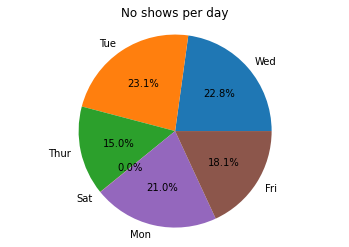

In [83]:
# to get the proportion of Noshows per day:
days= [5093, 5152, 3338, 9, 4690, 4037]
labels1 = 'Wed','Tue','Thur','Sat','Mon','Fri'
plt.pie(days,labels=labels1,autopct='%1.1f%%')
plt.title('No shows per day')
plt.axis('equal')
plt.show()

Tuesday had the maximum number of No shows, while Saturday had the least no shows.

In [63]:
#count of Neighbourhoods in the dataset
Area = df1['Neighbourhood'].value_counts().sort_index(ascending = False)
print(Area)

VILA RUBIM             141
UNIVERSITÁRIO           32
TABUAZEIRO             573
SÃO PEDRO              515
SÃO JOSÉ               428
                      ... 
BARRO VERMELHO          91
ARIOVALDO FAVALESSA     62
ANTÔNIO HONÓRIO         50
ANDORINHAS             521
AEROPORTO                1
Name: Neighbourhood, Length: 80, dtype: int64


Text(0.5, 1.0, 'Neighbourhood')

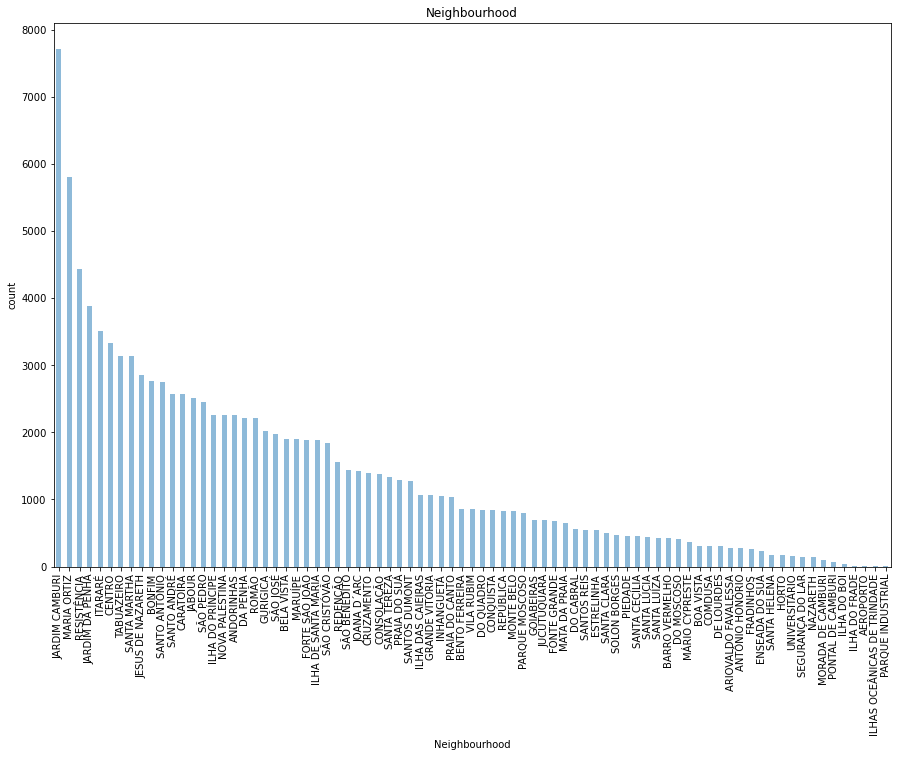

In [93]:
#Which Neighbourhood had more no shows?
plt.figure(figsize=[15,10])
df1.Neighbourhood.value_counts().plot(kind = 'bar', alpha = 0.5, xlabel="Neighbourhood", ylabel="count")
plt.title("Neighbourhood")

Most noshows came from Jardim Camburi Neighborhood.

In [23]:
# To show the gender with more noshows
def bar_plot(arg1):
    '''
    To use one function to visualize various variables
    '''
    df1[arg1].value_counts().plot(kind="bar", color=['black', 'red'], xlabel=arg1, ylabel="count", rot=0)
    plt.title(f'Count of Noshows for {arg1}'.title())

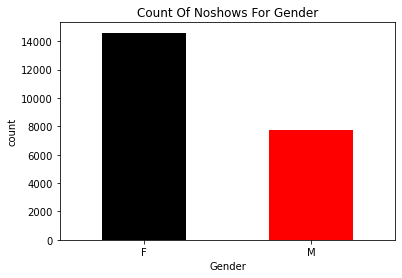

In [24]:
bar_plot('Gender')

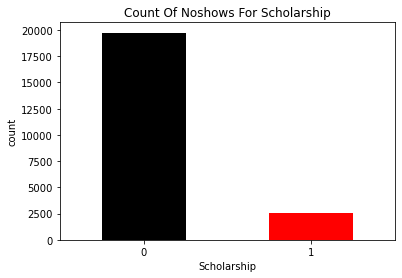

In [25]:
bar_plot('Scholarship')

Most no shows came from patients on the welfare program.

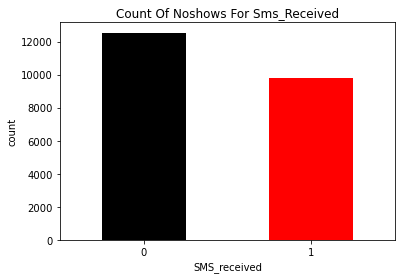

In [26]:
bar_plot('SMS_received')

A few more no show patients did not receive SMS regarding their appointments, compared to those who received them.

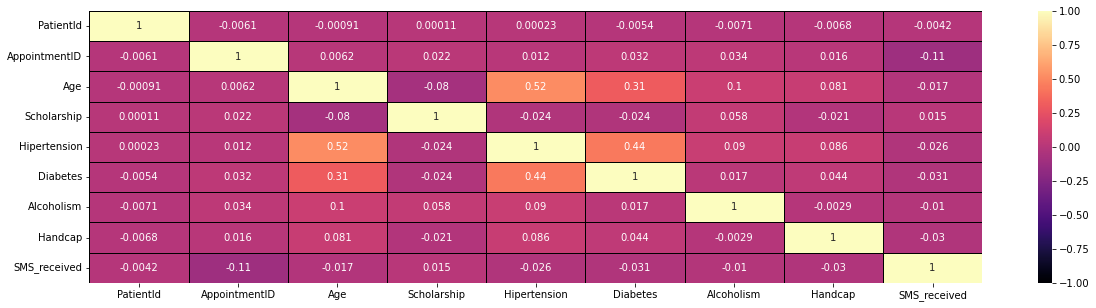

In [12]:
# Using a heatmap to show correlation between columns:
plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='magma', linewidths=.5, linecolor='black');

There is a mean correclation between hypertension and diabetes, and hypertension and age.

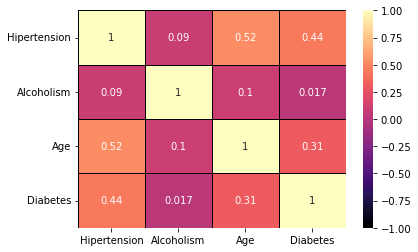

In [19]:
#Is age related to any of the diseases?
newdf = df1[['Hipertension', 'Alcoholism', 'Age', 'Diabetes']]
# Visualize correlation between columns
sns.heatmap(newdf.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='magma', linewidths=.5, linecolor='black');

There is a mean correlation with age and hypertension.

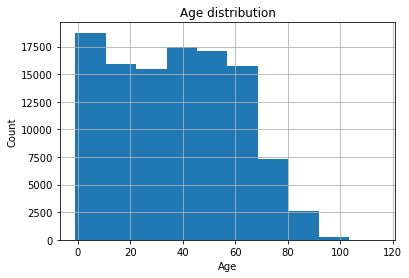

In [109]:
# age distribution
A = df1.Age.hist(bins=10);
A.set(xlabel = 'Age', ylabel = 'Count', title = 'Age distribution')
plt.show()

Most noshows were between 0-10 while least noshows were over 90.

#### CONCLUSIONS

From the above, we can conclude that:
1. More females missed their appointments in comparison to their male counterparts.
2. Self sponsored patients missed more appointments compared to those under scholarship.
3. Most no shows had received no SMS with their appointment details.
4. Tuesday had the highest number of Noshows while Saturday had the least.

#### LIMITATIONS

The project went smoothly, with the dataset proving easy to work with.
Snippets of my code came from different projects on my github repo https://github.com/Shee36